In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageDraw
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch

import numpy as np
from src.voc_dataset import *
from src.region_proposal import RegionProposalNetwork, get_target_weights
from src.generate_anchor_data import AnchorDataGenerator

import pickle

In [41]:
dataset = VOCDataSet("data/", "train", include_gt_lable=True, include_difficult_gt=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=5, collate_fn=collate_fn)
iterator = iter(dataloader)

11.0
11.0
11.0


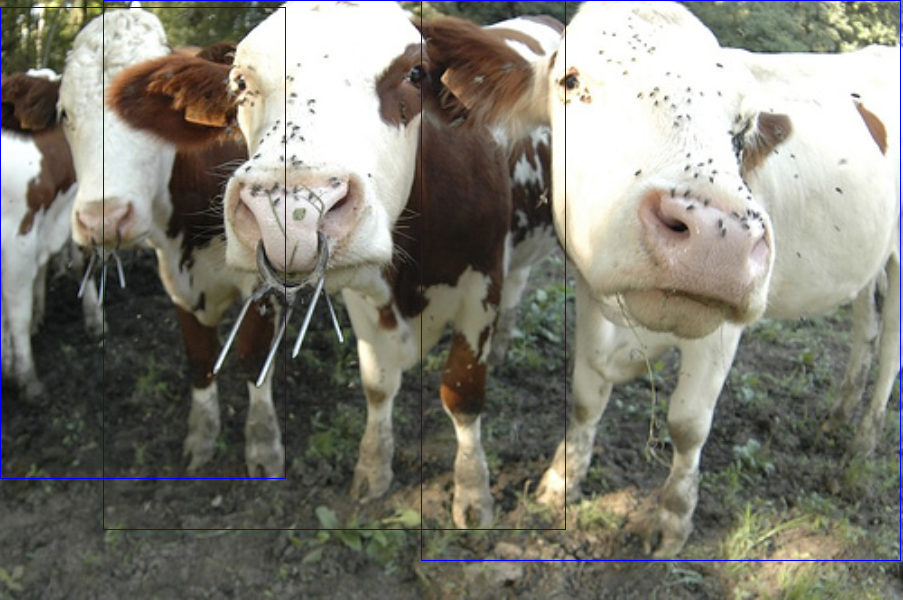

In [51]:
image, gt, label = next(iterator)
image = image.numpy()
image = image * PIXEL_STDS
image = image + PIXEL_MEANS
image = image * 255.0
image = image.squeeze().transpose(1, 2, 0).round().astype(np.uint8)
image = Image.fromarray(image)

image_draw = ImageDraw.ImageDraw(image)

true_bbox = gt.numpy()
for i in range(true_bbox.shape[0]):
    image_draw.rectangle(true_bbox[i, :], outline="blue")
    print(label[i])
image